EEG SIGNAL CLASSIFICATION USING CNN

In [1]:
import os
import time
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras import backend as K

from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
! for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done

C:\Users\Lenovo\miniconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
a was unexpected at this time.


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.9.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\lenovo\miniconda3\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: autokeras, object-detection


In [2]:
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

archive\columnLabels.csv
archive\demographic.csv
archive\ERPdata.csv
archive\mergedTrialData.csv
archive\time.csv
archive\1.csv\1.csv
archive\10.csv\10.csv
archive\11.csv\11.csv
archive\12.csv\12.csv
archive\13.csv\13.csv
archive\14.csv\14.csv
archive\15.csv\15.csv
archive\16.csv\16.csv
archive\17.csv\17.csv
archive\18.csv\18.csv
archive\19.csv\19.csv
archive\2.csv\2.csv
archive\20.csv\20.csv
archive\21.csv\21.csv
archive\22.csv\22.csv
archive\23.csv\23.csv
archive\24.csv\24.csv
archive\3.csv\3.csv
archive\4.csv\4.csv
archive\5.csv\5.csv
archive\6.csv\6.csv
archive\66.csv\66.csv
archive\67.csv\67.csv
archive\68.csv\68.csv
archive\69.csv\69.csv
archive\7.csv\7.csv
archive\70.csv\70.csv
archive\71.csv\71.csv
archive\72.csv\72.csv
archive\73.csv\73.csv
archive\74.csv\74.csv
archive\75.csv\75.csv
archive\76.csv\76.csv
archive\77.csv\77.csv
archive\78.csv\78.csv
archive\79.csv\79.csv
archive\8.csv\8.csv
archive\80.csv\80.csv
archive\81.csv\81.csv
archive\9.csv\9.csv


In [3]:
demographic = pd.read_csv("archive\demographic.csv")
demographic

,subject,group,gender,age,education
0,1,0,M,44,16.0
1,2,0,M,39,17.0
2,3,0,M,53,18.0
3,4,0,M,52,15.0
4,5,0,M,41,16.0
...,...,...,...,...,...
76,77,1,M,28,13.0
77,78,1,F,32,16.0
78,79,1,M,37,16.0
79,80,1,M,33,13.0


In [4]:
demographic[' group'].value_counts()

1    49
0    32
Name:  group, dtype: int64

In [5]:
demographic[' group'].mean()

0.6049382716049383

In [6]:
for i,t in enumerate(list(demographic[' group'])):
    if t:
        print(f"{i} - Schizophrenia")
    else:
        print(f"{i} - Healthy")

0 - Healthy
1 - Healthy
2 - Healthy
3 - Healthy
4 - Healthy
5 - Healthy
6 - Healthy
7 - Healthy
8 - Healthy
9 - Healthy
10 - Healthy
11 - Healthy
12 - Healthy
13 - Healthy
14 - Healthy
15 - Healthy
16 - Healthy
17 - Healthy
18 - Healthy
19 - Healthy
20 - Healthy
21 - Healthy
22 - Healthy
23 - Healthy
24 - Schizophrenia
25 - Schizophrenia
26 - Schizophrenia
27 - Schizophrenia
28 - Schizophrenia
29 - Schizophrenia
30 - Schizophrenia
31 - Schizophrenia
32 - Schizophrenia
33 - Schizophrenia
34 - Schizophrenia
35 - Schizophrenia
36 - Schizophrenia
37 - Schizophrenia
38 - Schizophrenia
39 - Schizophrenia
40 - Schizophrenia
41 - Schizophrenia
42 - Schizophrenia
43 - Schizophrenia
44 - Schizophrenia
45 - Schizophrenia
46 - Schizophrenia
47 - Schizophrenia
48 - Schizophrenia
49 - Schizophrenia
50 - Schizophrenia
51 - Schizophrenia
52 - Schizophrenia
53 - Schizophrenia
54 - Schizophrenia
55 - Schizophrenia
56 - Schizophrenia
57 - Schizophrenia
58 - Healthy
59 - Healthy
60 - Healthy
61 - Healthy


In [7]:
diagnosis_dict = dict(zip(demographic.subject, demographic[" group"]))
diagnosis_dict

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1}

In [8]:
labels = pd.read_csv("archive\columnLabels.csv")
labels

,subject,trial,condition,sample,Fp1,AF7,AF3,F1,F3,F5,...,P10,PO8,PO4,O2,VEOa,VEOb,HEOL,HEOR,Nose,TP10


In [9]:
electrodes_list = labels.columns[4:]
electrodes_list

Index(['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1',
       'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5',
       'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz',
       'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6',
       'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4',
       'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'VEOa',
       'VEOb', 'HEOL', 'HEOR', 'Nose', 'TP10'],
      dtype='object')

In [10]:
def averaged_by_N_rows(a, n):
    shape = a.shape
    assert len(shape) == 2
    assert shape[0] % n == 0
    b = a.reshape(shape[0]//n,n,shape[1])
    mean_vec = b.mean(axis=1)
    return mean_vec

In [11]:
N_Averaged = 16
x_counter = 0
X = np.zeros((45*100,9216*len(electrodes_list)//N_Averaged),dtype="float32")
Y = np.zeros(len(X))

csv_paths = []
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        csv_paths = csv_paths + [os.path.join(dirname,filename)]
        
column_list = pd.read_csv("archive\columnLabels.csv").columns
for person_number,path in tqdm(enumerate(csv_paths,1)):
    csv_path = path
    
    df = pd.read_csv(csv_path,header=None,names=column_list)
    trials_list = set(df.trial)
    
    for t1, trial_number in enumerate(trials_list):
        number_of_trials = len(df[df.trial == trial_number])
        if number_of_trials == 9216.0:
            current_sample_matrix = df[df.trial == trial_number][electrodes_list].values
            averaged_by_N = averaged_by_N_rows(current_sample_matrix, n=N_Averaged)
            averaged_by_N_big_vec = averaged_by_N.reshape(-1)
            X[x_counter] = averaged_by_N_big_vec.astype(np.float32)
            Y[x_counter] = diagnosis_dict[person_number]
            x_counter += 1
print("Total trials with the Appropriate number of measurements - ", x_counter)
X = X[: x_counter]
Y = Y[: x_counter]
        
print("Total trials with the Appropriate number of measurements- ", x_counter)

0it [00:00, ?it/s]

Total trials with the Appropriate number of measurements -  3571
Total trials with the Appropriate number of measurements-  3571


In [12]:
X.shape

(3571, 40320)

In [13]:
Y.shape

(3571,)

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state = 42,stratify = Y)

In [15]:
X_norm = (normalize(X.reshape(-1,70),axis=0, norm='max')).reshape(X.shape)

In [16]:
X_train_norm,X_test_norm,Y_train_norm,Y_test_norm = train_test_split(X_norm,Y,test_size=0.2,shuffle=True,random_state=42)

In [17]:
_norm = X

In [18]:
X_train_2d = X_train_norm.reshape(X_train_norm.shape[0],len(electrodes_list),X_train_norm.shape[1]//len(electrodes_list),1)
X_test_2d = X_test_norm.reshape(X_test_norm.shape[0],len(electrodes_list),X_test_norm.shape[1]//len(electrodes_list),1)

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 20),
                 activation='tanh',
                 input_shape=(X_train_2d.shape[1:])))
model.add(MaxPooling2D(pool_size=(5, 15)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='tanh',))
model.add(MaxPooling2D(pool_size=(3, 3)))
          

model.add(Dropout(0.15))
model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.optimizers.Adam(0.000005),
              metrics=['acc'])

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.optimizers.Adam(0.0000075),
              metrics=['acc'])

In [24]:
history_params = []

In [29]:
history_2 = model.fit(X_train_2d, Y_train_norm,
          batch_size=256,
          epochs=10,
          verbose=1,
          shuffle=True,
          validation_data=(X_test_2d, Y_test_norm))

Epoch 1/10
12/12 [==============================] - 83s 4s/step - loss: 0.6875 - acc: 0.5231 - val_loss: 0.6927 - val_acc: 0.4965
Epoch 2/10
12/12 [==============================] - 50s 4s/step - loss: 0.6872 - acc: 0.5231 - val_loss: 0.6927 - val_acc: 0.4965
Epoch 3/10
12/12 [==============================] - 53s 4s/step - loss: 0.6873 - acc: 0.5231 - val_loss: 0.6925 - val_acc: 0.4965
Epoch 4/10
12/12 [==============================] - 55s 5s/step - loss: 0.6871 - acc: 0.5231 - val_loss: 0.6925 - val_acc: 0.4965
Epoch 5/10
12/12 [==============================] - 53s 4s/step - loss: 0.6870 - acc: 0.5231 - val_loss: 0.6924 - val_acc: 0.4965
Epoch 6/10
12/12 [==============================] - 56s 5s/step - loss: 0.6868 - acc: 0.5231 - val_loss: 0.6924 - val_acc: 0.4965
Epoch 7/10
12/12 [==============================] - 62s 5s/step - loss: 0.6867 - acc: 0.5231 - val_loss: 0.6923 - val_acc: 0.4965
Epoch 8/10
12/12 [==============================] - 53s 4s/step - loss: 0.6865 - acc: 0.52

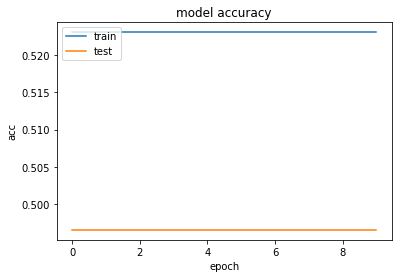

In [31]:
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

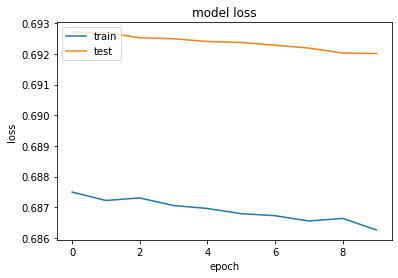

In [33]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
accuracy, loss = model.evaluate(X_test_2d, Y_test_norm)
print(f"Val accuracy={accuracy}  val loss={loss}")

23/23 [==============================] - 1s 61ms/step - loss: 0.6920 - acc: 0.4965
Val accuracy=0.6920133829116821  val loss=0.4965035021305084


In [35]:
y_predicted =  model.predict(X_test_2d)

confusion_matr = confusion_matrix(Y_test_norm, np.round(model.predict(X_test_2d)))
confusion_matr

23/23 [==============================] - 1s 61ms/step


array([[  0, 360],
       [  0, 355]], dtype=int64)